ValueError: x and y must have same first dimension, but have shapes (1000,) and (9990,)

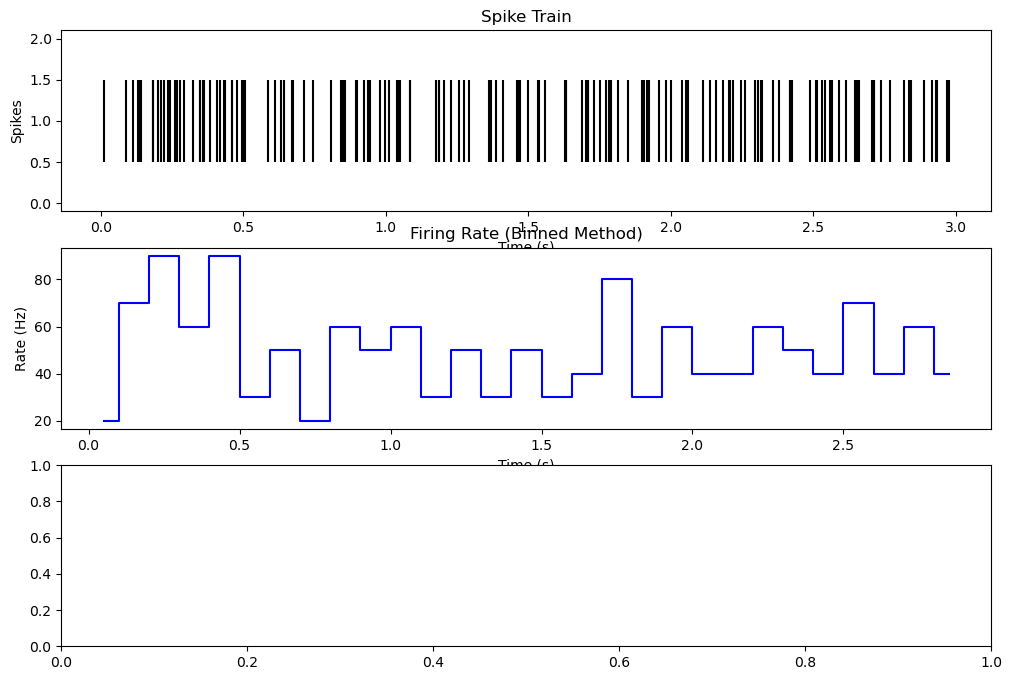

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Function to generate synthetic spike train data for a single trial
def generate_spike_train(T, rate):
    """
    Generate a synthetic spike train for a single trial.
    Spikes are generated using a Poisson process with a given rate.

    Parameters:
    T (float): Duration of the trial in seconds.
    rate (float): Firing rate in Hz (spikes per second).

    Returns:
    spike_times (numpy array): Array of spike times.
    """
    # Expected number of spikes
    expected_spike_count = int(T * rate)
    
    # Generate spike times uniformly distributed over the interval [0, T]
    spike_times = np.sort(np.random.uniform(0, T, expected_spike_count))
    return spike_times

# Function to compute the firing rate using a binning method
def compute_firing_rate_binned(spike_times, T, dt):
    """
    Compute the firing rate using the binning method.

    Parameters:
    spike_times (numpy array): Array of spike times.
    T (float): Duration of the trial in seconds.
    dt (float): Bin size in seconds.

    Returns:
    time_bins (numpy array): Array of time bin centers.
    firing_rate (numpy array): Firing rate in each time bin.
    """
    # Create time bins
    time_bins = np.arange(0, T, dt)
    
    # Count the number of spikes in each bin
    spike_counts, _ = np.histogram(spike_times, bins=time_bins)
    
    # Compute the firing rate (spike count divided by bin width)
    firing_rate = spike_counts / dt
    
    # Time bin centers for plotting
    time_bins_centers = time_bins[:-1] + dt / 2
    return time_bins_centers, firing_rate

# Function to compute the firing rate using a sliding window method
def compute_firing_rate_sliding_window(spike_times, T, dt):
    """
    Compute the firing rate using a sliding window method.

    Parameters:
    spike_times (numpy array): Array of spike times.
    T (float): Duration of the trial in seconds.
    dt (float): Window size in seconds.

    Returns:
    time_points (numpy array): Array of time points for firing rate.
    firing_rate (numpy array): Firing rate at each time point.
    """
    # Create time points with fine resolution
    time_points = np.arange(0, T, dt / 10)
    
    # Initialize the firing rate array
    firing_rate = np.zeros_like(time_points)
    
    # Sliding window approach
    for i, t in enumerate(time_points):
        # Count spikes within the window [t - dt/2, t + dt/2]
        window_start = t - dt / 2
        window_end = t + dt / 2
        firing_rate[i] = np.sum((spike_times >= window_start) & (spike_times < window_end)) / dt
    
    return time_points, firing_rate

# Function to compute the firing rate using a Gaussian kernel
def compute_firing_rate_gaussian_kernel(spike_times, T, sigma):
    """
    Compute the firing rate using a Gaussian kernel.

    Parameters:
    spike_times (numpy array): Array of spike times.
    T (float): Duration of the trial in seconds.
    sigma (float): Standard deviation of the Gaussian kernel in seconds.

    Returns:
    time_points (numpy array): Array of time points for firing rate.
    firing_rate_smoothed (numpy array): Smoothed firing rate at each time point.
    """
    # Create time points with fine resolution
    time_points = np.linspace(0, T, 1000)
    
    # Compute firing rate using the sliding window method
    _, firing_rate = compute_firing_rate_sliding_window(spike_times, T, time_points[1] - time_points[0])
    
    # Smooth the firing rate using a Gaussian filter
    firing_rate_smoothed = gaussian_filter1d(firing_rate, sigma / (time_points[1] - time_points[0]))
    
    return time_points, firing_rate_smoothed

# Main function to simulate and analyze firing rates
def main():
    # Parameters
    T = 3.0  # Duration of the trial in seconds
    rate = 50  # Firing rate in Hz
    dt = 0.1  # Bin size or window size in seconds
    sigma = 0.1  # Standard deviation of the Gaussian kernel in seconds
    
    # Generate synthetic spike train
    spike_times = generate_spike_train(T, rate)
    
    # Compute firing rates using different methods
    time_bins, firing_rate_binned = compute_firing_rate_binned(spike_times, T, dt)
    time_points_sliding, firing_rate_sliding = compute_firing_rate_sliding_window(spike_times, T, dt)
    time_points_gaussian, firing_rate_gaussian = compute_firing_rate_gaussian_kernel(spike_times, T, sigma)
    
    # Plotting the results
    plt.figure(figsize=(12, 8))
    
    # Plot spike train
    plt.subplot(3, 1, 1)
    plt.eventplot(spike_times, color='black')
    plt.title('Spike Train')
    plt.xlabel('Time (s)')
    plt.ylabel('Spikes')
    
    # Plot firing rate using the binning method
    plt.subplot(3, 1, 2)
    plt.step(time_bins, firing_rate_binned, where='mid', color='blue')
    plt.title('Firing Rate (Binned Method)')
    plt.xlabel('Time (s)')
    plt.ylabel('Rate (Hz)')
    
    # Plot firing rate using the Gaussian kernel method
    plt.subplot(3, 1, 3)
    plt.plot(time_points_gaussian, firing_rate_gaussian, color='red')
    plt.title('Firing Rate (Gaussian Kernel)')
    plt.xlabel('Time (s)')
    plt.ylabel('Rate (Hz)')
    
    plt.tight_layout()
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()


ValueError: x and y must have same first dimension, but have shapes (3000,) and (29990,)

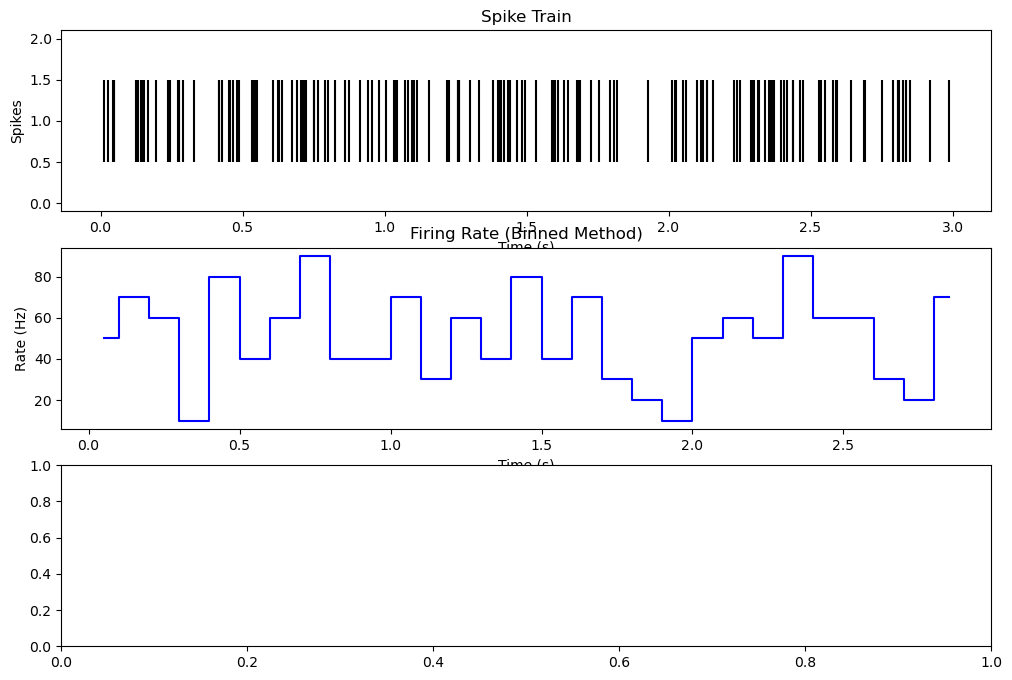

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Function to generate synthetic spike train data for a single trial
def generate_spike_train(T, rate):
    """
    Generate a synthetic spike train for a single trial.
    Spikes are generated using a Poisson process with a given rate.

    Parameters:
    T (float): Duration of the trial in seconds.
    rate (float): Firing rate in Hz (spikes per second).

    Returns:
    spike_times (numpy array): Array of spike times.
    """
    expected_spike_count = int(T * rate)
    spike_times = np.sort(np.random.uniform(0, T, expected_spike_count))
    return spike_times

# Function to compute the firing rate using a binning method
def compute_firing_rate_binned(spike_times, T, dt):
    """
    Compute the firing rate using the binning method.

    Parameters:
    spike_times (numpy array): Array of spike times.
    T (float): Duration of the trial in seconds.
    dt (float): Bin size in seconds.

    Returns:
    time_bins (numpy array): Array of time bin centers.
    firing_rate (numpy array): Firing rate in each time bin.
    """
    time_bins = np.arange(0, T, dt)
    spike_counts, _ = np.histogram(spike_times, bins=time_bins)
    firing_rate = spike_counts / dt
    time_bins_centers = time_bins[:-1] + dt / 2
    return time_bins_centers, firing_rate

# Function to compute the firing rate using a sliding window method
def compute_firing_rate_sliding_window(spike_times, T, dt):
    """
    Compute the firing rate using a sliding window method.

    Parameters:
    spike_times (numpy array): Array of spike times.
    T (float): Duration of the trial in seconds.
    dt (float): Window size in seconds.

    Returns:
    time_points (numpy array): Array of time points for firing rate.
    firing_rate (numpy array): Firing rate at each time point.
    """
    time_points = np.arange(0, T, dt / 10)
    firing_rate = np.zeros_like(time_points)
    
    for i, t in enumerate(time_points):
        window_start = t - dt / 2
        window_end = t + dt / 2
        firing_rate[i] = np.sum((spike_times >= window_start) & (spike_times < window_end)) / dt
    
    return time_points, firing_rate

# Function to compute the firing rate using a Gaussian kernel
def compute_firing_rate_gaussian_kernel(spike_times, T, sigma):
    """
    Compute the firing rate using a Gaussian kernel.

    Parameters:
    spike_times (numpy array): Array of spike times.
    T (float): Duration of the trial in seconds.
    sigma (float): Standard deviation of the Gaussian kernel in seconds.

    Returns:
    time_points (numpy array): Array of time points for firing rate.
    firing_rate_smoothed (numpy array): Smoothed firing rate at each time point.
    """
    # Create time points with fine resolution
    time_points = np.linspace(0, T, int(T * 1000))  # 1000 points per second
    
    # Compute firing rate using the sliding window method
    _, firing_rate = compute_firing_rate_sliding_window(spike_times, T, time_points[1] - time_points[0])
    
    # Smooth the firing rate using a Gaussian filter
    firing_rate_smoothed = gaussian_filter1d(firing_rate, sigma / (time_points[1] - time_points[0]))
    
    return time_points, firing_rate_smoothed

# Main function to simulate and analyze firing rates
def main():
    # Parameters
    T = 3.0  # Duration of the trial in seconds
    rate = 50  # Firing rate in Hz
    dt = 0.1  # Bin size or window size in seconds
    sigma = 0.1  # Standard deviation of the Gaussian kernel in seconds
    
    # Generate synthetic spike train
    spike_times = generate_spike_train(T, rate)
    
    # Compute firing rates using different methods
    time_bins, firing_rate_binned = compute_firing_rate_binned(spike_times, T, dt)
    time_points_sliding, firing_rate_sliding = compute_firing_rate_sliding_window(spike_times, T, dt)
    time_points_gaussian, firing_rate_gaussian = compute_firing_rate_gaussian_kernel(spike_times, T, sigma)
    
    # Plotting the results
    plt.figure(figsize=(12, 8))
    
    # Plot spike train
    plt.subplot(3, 1, 1)
    plt.eventplot(spike_times, color='black')
    plt.title('Spike Train')
    plt.xlabel('Time (s)')
    plt.ylabel('Spikes')
    
    # Plot firing rate using the binning method
    plt.subplot(3, 1, 2)
    plt.step(time_bins, firing_rate_binned, where='mid', color='blue')
    plt.title('Firing Rate (Binned Method)')
    plt.xlabel('Time (s)')
    plt.ylabel('Rate (Hz)')
    
    # Plot firing rate using the Gaussian kernel method
    plt.subplot(3, 1, 3)
    plt.plot(time_points_gaussian, firing_rate_gaussian, color='red')
    plt.title('Firing Rate (Gaussian Kernel)')
    plt.xlabel('Time (s)')
    plt.ylabel('Rate (Hz)')
    
    plt.tight_layout()
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()



ValueError: x and y must have same first dimension, but have shapes (3000,) and (29990,)

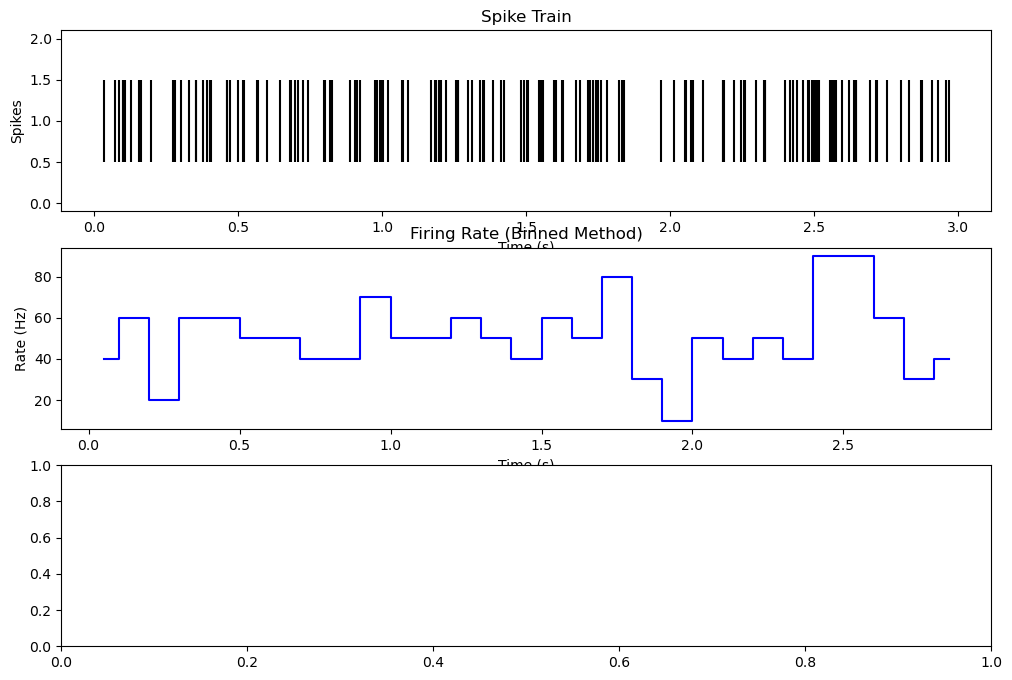

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Function to generate synthetic spike train data for a single trial
def generate_spike_train(T, rate):
    """
    Generate a synthetic spike train for a single trial.
    Spikes are generated using a Poisson process with a given rate.

    Parameters:
    T (float): Duration of the trial in seconds.
    rate (float): Firing rate in Hz (spikes per second).

    Returns:
    spike_times (numpy array): Array of spike times.
    """
    expected_spike_count = int(T * rate)
    spike_times = np.sort(np.random.uniform(0, T, expected_spike_count))
    return spike_times

# Function to compute the firing rate using a binning method
def compute_firing_rate_binned(spike_times, T, dt):
    """
    Compute the firing rate using the binning method.

    Parameters:
    spike_times (numpy array): Array of spike times.
    T (float): Duration of the trial in seconds.
    dt (float): Bin size in seconds.

    Returns:
    time_bins (numpy array): Array of time bin centers.
    firing_rate (numpy array): Firing rate in each time bin.
    """
    time_bins = np.arange(0, T, dt)
    spike_counts, _ = np.histogram(spike_times, bins=time_bins)
    firing_rate = spike_counts / dt
    time_bins_centers = time_bins[:-1] + dt / 2
    return time_bins_centers, firing_rate

# Function to compute the firing rate using a sliding window method
def compute_firing_rate_sliding_window(spike_times, T, dt):
    """
    Compute the firing rate using a sliding window method.

    Parameters:
    spike_times (numpy array): Array of spike times.
    T (float): Duration of the trial in seconds.
    dt (float): Window size in seconds.

    Returns:
    time_points (numpy array): Array of time points for firing rate.
    firing_rate (numpy array): Firing rate at each time point.
    """
    time_points = np.arange(0, T, dt / 10)
    firing_rate = np.zeros_like(time_points)
    
    for i, t in enumerate(time_points):
        window_start = t - dt / 2
        window_end = t + dt / 2
        firing_rate[i] = np.sum((spike_times >= window_start) & (spike_times < window_end)) / dt
    
    return time_points, firing_rate

# Function to compute the firing rate using a Gaussian kernel
def compute_firing_rate_gaussian_kernel(spike_times, T, sigma):
    """
    Compute the firing rate using a Gaussian kernel.

    Parameters:
    spike_times (numpy array): Array of spike times.
    T (float): Duration of the trial in seconds.
    sigma (float): Standard deviation of the Gaussian kernel in seconds.

    Returns:
    time_points (numpy array): Array of time points for firing rate.
    firing_rate_smoothed (numpy array): Smoothed firing rate at each time point.
    """
    # Create time points with fine resolution
    time_points = np.linspace(0, T, int(T * 1000))  # 1000 points per second
    
    # Compute firing rate using the sliding window method
    _, firing_rate = compute_firing_rate_sliding_window(spike_times, T, time_points[1] - time_points[0])
    
    # Smooth the firing rate using a Gaussian filter
    firing_rate_smoothed = gaussian_filter1d(firing_rate, sigma / (time_points[1] - time_points[0]))
    
    return time_points, firing_rate_smoothed

# Main function to simulate and analyze firing rates
def main():
    # Parameters
    T = 3.0  # Duration of the trial in seconds
    rate = 50  # Firing rate in Hz
    dt = 0.1  # Bin size or window size in seconds
    sigma = 0.1  # Standard deviation of the Gaussian kernel in seconds
    
    # Generate synthetic spike train
    spike_times = generate_spike_train(T, rate)
    
    # Compute firing rates using different methods
    time_bins, firing_rate_binned = compute_firing_rate_binned(spike_times, T, dt)
    time_points_sliding, firing_rate_sliding = compute_firing_rate_sliding_window(spike_times, T, dt)
    time_points_gaussian, firing_rate_gaussian = compute_firing_rate_gaussian_kernel(spike_times, T, sigma)
    
    # Plotting the results
    plt.figure(figsize=(12, 8))
    
    # Plot spike train
    plt.subplot(3, 1, 1)
    plt.eventplot(spike_times, color='black')
    plt.title('Spike Train')
    plt.xlabel('Time (s)')
    plt.ylabel('Spikes')
    
    # Plot firing rate using the binning method
    plt.subplot(3, 1, 2)
    plt.step(time_bins, firing_rate_binned, where='mid', color='blue')
    plt.title('Firing Rate (Binned Method)')
    plt.xlabel('Time (s)')
    plt.ylabel('Rate (Hz)')
    
    # Plot firing rate using the Gaussian kernel method
    plt.subplot(3, 1, 3)
    plt.plot(time_points_gaussian, firing_rate_gaussian, color='red')
    plt.title('Firing Rate (Gaussian Kernel)')
    plt.xlabel('Time (s)')
    plt.ylabel('Rate (Hz)')
    
    plt.tight_layout()
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()


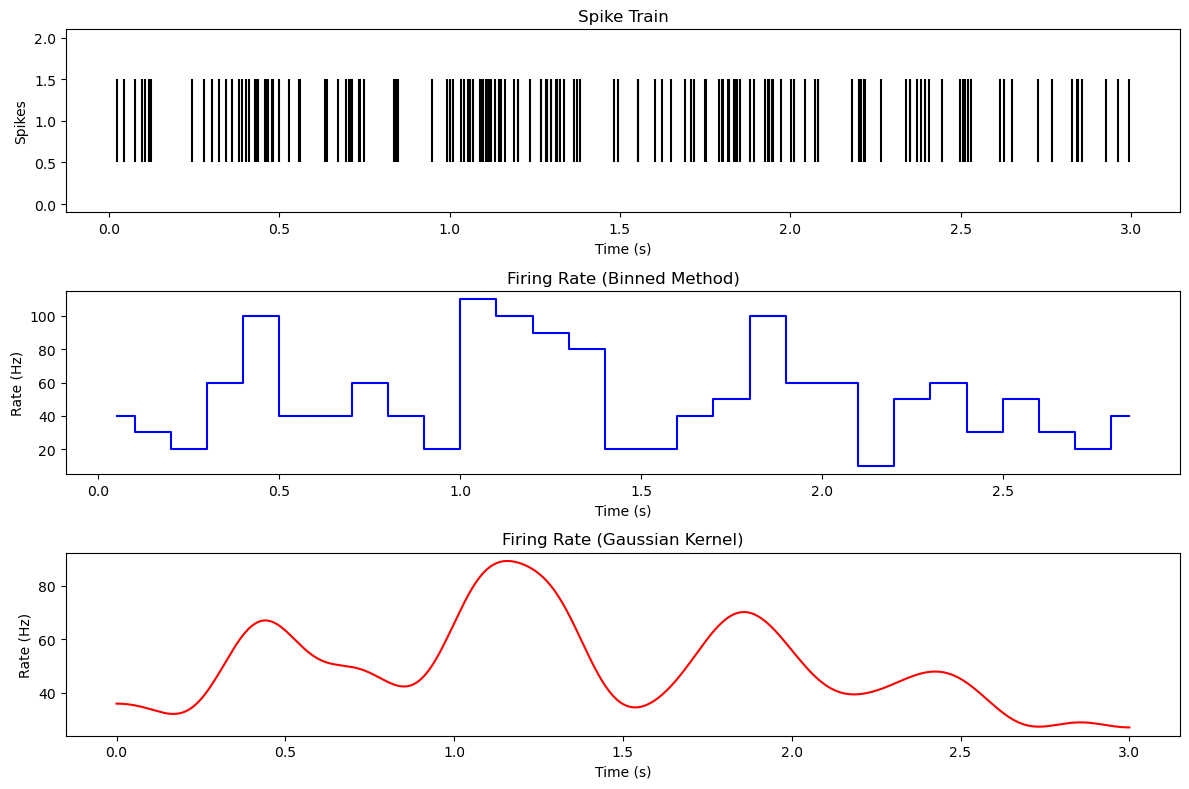

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Function to generate synthetic spike train data for a single trial
def generate_spike_train(T, rate):
    """
    Generate a synthetic spike train for a single trial.
    Spikes are generated using a Poisson process with a given rate.

    Parameters:
    T (float): Duration of the trial in seconds.
    rate (float): Firing rate in Hz (spikes per second).

    Returns:
    spike_times (numpy array): Array of spike times.
    """
    expected_spike_count = int(T * rate)
    spike_times = np.sort(np.random.uniform(0, T, expected_spike_count))
    return spike_times

# Function to compute the firing rate using a binning method
def compute_firing_rate_binned(spike_times, T, dt):
    """
    Compute the firing rate using the binning method.

    Parameters:
    spike_times (numpy array): Array of spike times.
    T (float): Duration of the trial in seconds.
    dt (float): Bin size in seconds.

    Returns:
    time_bins (numpy array): Array of time bin centers.
    firing_rate (numpy array): Firing rate in each time bin.
    """
    time_bins = np.arange(0, T, dt)
    spike_counts, _ = np.histogram(spike_times, bins=time_bins)
    firing_rate = spike_counts / dt
    time_bins_centers = time_bins[:-1] + dt / 2
    return time_bins_centers, firing_rate

# Function to compute the firing rate using a sliding window method
def compute_firing_rate_sliding_window(spike_times, T, dt):
    """
    Compute the firing rate using a sliding window method.

    Parameters:
    spike_times (numpy array): Array of spike times.
    T (float): Duration of the trial in seconds.
    dt (float): Window size in seconds.

    Returns:
    time_points (numpy array): Array of time points for firing rate.
    firing_rate (numpy array): Firing rate at each time point.
    """
    time_points = np.arange(0, T, dt / 10)
    firing_rate = np.zeros_like(time_points)
    
    for i, t in enumerate(time_points):
        window_start = t - dt / 2
        window_end = t + dt / 2
        firing_rate[i] = np.sum((spike_times >= window_start) & (spike_times < window_end)) / dt
    
    return time_points, firing_rate

# Function to compute the firing rate using a Gaussian kernel
def compute_firing_rate_gaussian_kernel(spike_times, T, sigma):
    """
    Compute the firing rate using a Gaussian kernel.

    Parameters:
    spike_times (numpy array): Array of spike times.
    T (float): Duration of the trial in seconds.
    sigma (float): Standard deviation of the Gaussian kernel in seconds.

    Returns:
    time_points (numpy array): Array of time points for firing rate.
    firing_rate_smoothed (numpy array): Smoothed firing rate at each time point.
    """
    # Create time points with fine resolution
    time_points = np.linspace(0, T, int(T * 1000))  # 1000 points per second
    
    # Compute firing rate using the sliding window method
    firing_rate = np.zeros_like(time_points)
    dt = time_points[1] - time_points[0]  # Calculate small time step based on time_points
    
    for i, t in enumerate(time_points):
        window_start = t - sigma / 2
        window_end = t + sigma / 2
        firing_rate[i] = np.sum((spike_times >= window_start) & (spike_times < window_end)) / sigma
    
    # Smooth the firing rate using a Gaussian filter
    firing_rate_smoothed = gaussian_filter1d(firing_rate, sigma / dt)
    
    return time_points, firing_rate_smoothed

# Main function to simulate and analyze firing rates
def main():
    # Parameters
    T = 3.0  # Duration of the trial in seconds
    rate = 50  # Firing rate in Hz
    dt = 0.1  # Bin size or window size in seconds
    sigma = 0.1  # Standard deviation of the Gaussian kernel in seconds
    
    # Generate synthetic spike train
    spike_times = generate_spike_train(T, rate)
    
    # Compute firing rates using different methods
    time_bins, firing_rate_binned = compute_firing_rate_binned(spike_times, T, dt)
    time_points_sliding, firing_rate_sliding = compute_firing_rate_sliding_window(spike_times, T, dt)
    time_points_gaussian, firing_rate_gaussian = compute_firing_rate_gaussian_kernel(spike_times, T, sigma)
    
    # Plotting the results
    plt.figure(figsize=(12, 8))
    
    # Plot spike train
    plt.subplot(3, 1, 1)
    plt.eventplot(spike_times, color='black')
    plt.title('Spike Train')
    plt.xlabel('Time (s)')
    plt.ylabel('Spikes')
    
    # Plot firing rate using the binning method
    plt.subplot(3, 1, 2)
    plt.step(time_bins, firing_rate_binned, where='mid', color='blue')
    plt.title('Firing Rate (Binned Method)')
    plt.xlabel('Time (s)')
    plt.ylabel('Rate (Hz)')
    
    # Plot firing rate using the Gaussian kernel method
    plt.subplot(3, 1, 3)
    plt.plot(time_points_gaussian, firing_rate_gaussian, color='red')
    plt.title('Firing Rate (Gaussian Kernel)')
    plt.xlabel('Time (s)')
    plt.ylabel('Rate (Hz)')
    
    plt.tight_layout()
    plt.show()

# Run the main function
if __name__ == "__main__":
    main()


In [ ]:
#This program simulates and analyzes neural spike train data using different methods to compute the firing rate. The key steps are:

#Generate Spike Train: A synthetic spike train is generated using a Poisson process, simulating neural spikes over a given trial duration.

#Compute Firing Rates: Three methods are used to compute the firing rate:

#Binned Method: The spike times are divided into time bins, and the firing rate is calculated by counting the spikes in each bin.
#Sliding Window Method: A sliding window moves across time points, and the firing rate is computed within each window.
#Gaussian Kernel Method: A Gaussian kernel is applied to smooth the firing rate, providing a continuous and smoothed estimate.
#Plot Results: The program plots the spike train and the firing rates calculated using the three methods. This visual comparison helps in understanding how different methods affect the firing rate estimation.

#The program is designed to demonstrate the impact of various methods on firing rate analysis, which is crucial in neuroscience for understanding neural acti